<a href="https://colab.research.google.com/github/jordankiesler/ML_Labs/blob/main/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Welcome to todays lab session where we will focus on linear regression. This lab will all be in Python, but the majority of the code is provided for you. As well as this notebook, you could also take a look at the regression quiz on canvas.

The easiest way to complete this session is to log into a Google account and save a copy to your google drive. Alternatively, you could save this document to your machine and open as a Jupyter notebook. This lab only requires 2 external libraries, matplotlib and numpy.

In [ ]:
# Import numpy for linear algebra support
import numpy as np
# Matplotlib is our main data plotting library
import matplotlib.pyplot as plt

# Set a training data range that's smaller than our test range, so we can demonstrate extrapolation
x_train_range = [-20, 20]
x_test_range = [-30, 30]
x_test = np.linspace(*x_test_range, 100).reshape((-1,1)) 
#or you can specify the interval as an input
#x_test = np.linspace(-30,30, 100, n_samples)

#Creating some test data

We can generate our own data that fulfills our model assumptions to play with.

Below is a function called create_data, which randomly generates a pair of linear model weights to synthesise some data. Note that the function takes a parameter called noise_sigma. This refers to the Gaussian distributed random noise that we expect to see in our model. It also takes n_samples, the number of data samples to generate.

Try running the code below a few times, and note how the resulting plot changes each time you run it. Why is the plot changing? What do you notice about the plot for different model weight values?

Try adjusting the value of sigma, what effect does this have on the plots?

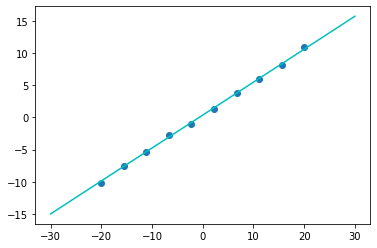

(0.5122330339892188, 0.3566663010908397)


In [ ]:
# Let's start by defining a function some data that follows a linear assumption
def create_data(noise_sigma=0.25, n_samples=10):
  # Sample some data at even intervals in x. Choose n_sample points
  x = np.linspace(*x_train_range, n_samples) #here the interval is used as an input
  # Let's randomly generate some coefficient weights
  intercept = np.random.randn()
  linear_coeff = np.random.randn()
  
  # Generate our training data:
  y = x*linear_coeff + intercept
  # We need to remember to add some noise. We sample random normally
  # distributed values and scale them by the standard deviation
  y += np.random.randn(*y.shape) * noise_sigma

  # Let's store the noise free, ground truth function in the right range
  y_gt = x_test*linear_coeff + intercept
  return x.reshape((n_samples, -1)), y.reshape((n_samples, 1)), (linear_coeff, intercept), y_gt

# If we call this function it returns some x and y points as well as the real model weights
x, y, weights, y_gt = create_data()
# Show the ground truth function in cyan
plt.plot(x_test, y_gt, 'c-')
plt.scatter(x, y)
plt.show()

print(weights)

# Fitting a model to data
As we've seen in the lectures, one way of fitting a linear regression model (estimating the parameters) is to calculate gradient analytically and set it to zero. The optimal parameters w are given by: $$\mathbf{w} = (X^TX)^{-1}X^T\mathbf{y} = X^{+}\mathbf{y}$$, and $X^+$ is the psuedo-inverse (np.pinv) of X. For simple regression problems like we have here, this is an effective and simple solution.

1. Read through the code below and see how this equates with the mathematics in the slides.

2. Run the code for different generated data samples (running create_data again). How can we measure how well the model is doing? Try running this code for larger/smaller values of sigma. How does this affect the result?

3. Try also adjusting the number of data samples. How does this affect the results?

4. What was the cost function that is being minimised by this model? Can you calculate the value of cost function for the solution below? hint: [np.square](https://numpy.org/doc/1.18/reference/generated/numpy.square.html) and [np.mean](https://numpy.org/doc/1.18/reference/generated/numpy.mean.html) might be helpful


(10, 2)
[[0.51852706 0.32576962]] (0.5122330339892188, 0.3566663010908397)


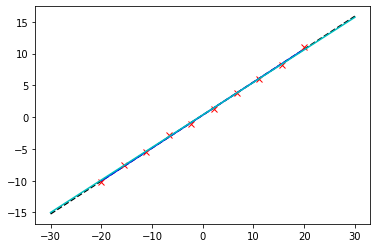

In [ ]:
# augment our data to allow for a constant intercept
def augment_x(data):
  # We need to add a column ones to x to describe the bias/intercept
  augmented_data = np.hstack([data, np.ones_like(data)])
  return augmented_data

def fit_linear_regression(_x, _y):
  _x = augment_x(_x)
  print(_x.shape)
  # Estimate the weights by multiplying the psuedo-inverse by y
  estimated_weights = np.dot(np.linalg.pinv(_x), _y)
  #estimated_weights = np.dot(np.dot(np.linalg.inv(np.dot(_x.T,_x)),_x.T),_y)
  return estimated_weights

# Produce our prediction for a given value of x for the fitted model weights
def f_hat(_x, _w):
  # Calculate our predicted points for each value of x
  y_hat = np.dot(augment_x(_x), _w) 
  return y_hat

estimated_weights = fit_linear_regression(x, y)

# Print the esimated weights and then the real weights
print(estimated_weights.T, weights)

# Calculate our predicted points for each value of x
y_hat = f_hat(x, estimated_weights)

# Plot the fitted function outside of the range with a black dotted line
plt.plot(x_test, f_hat(x_test, estimated_weights), 'k--')
# Plot the fitted function inside the training range with a blue line
plt.plot(x, y_hat, 'b-')
# Show the training points as red crosses
plt.plot(x, y, 'rx')
# Show the ground truth function in cyan
plt.plot(x_test, y_gt, 'c-')
plt.show()